# Project Introduction  

This project falls within the scope of **credit risk analysis**, aiming to build a robust model capable of discerning individuals across different risk categories based on a wide and diversified set of attributes.  

The selected dataset, **“credit-g”**, obtained from the OpenML platform, serves as the foundation upon which this approach is built.  

Accurate credit risk classification is extremely important for financial institutions and companies that grant loans. A precise model can:  

- Help automate and optimize the decision-making process by identifying in advance the applicants most likely to meet their financial commitments.  
- Strengthen risk management mechanisms.  
- Facilitate the credit granting process.  
- Contribute to risk mitigation and the maintenance of the institution’s financial stability.  

---

# Hypothesis Proposals  

Since my topic will address a **classification problem**, I will use the following five model types as hypotheses:  

1. Logistic Regression  
2. Support Vector Machine (SVM)  
3. Neural Networks  
4. Decision Tree  
5. Random Forest  

---

# Model Exploration Plan  

My exploration of the model will be based on **four processing phases**:  

1. **General observation of the model’s characteristics**  
   - To better understand what I am working with.  

2. **Initial data preprocessing**  
   - If necessary.  

3. **Testing each hypothesis**  
   - Train a simple model for each hypothesis.  
   - Evaluate their performance.  

4. **Final model training**  
   - After evaluating the hypotheses, choose the best-performing model type.  
   - Train it in-depth.  

---

# Tools and Setup  

- Install **OpenML** to import the dataset intended for study.  


In [4]:
!python -m pip install --upgrade pip



  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1


In [5]:
pip install openml

Note: you may need to restart the kernel to use updated packages.


### Lets import the dataset to Jupyter notebook 

In [6]:
import openml
from openml import datasets
import pandas as pd

In [7]:
import openml
from openml import datasets
import pandas as pd

# we use the dataset_id to indicate which dataset we want to fetch from OpenML
dataset_id = 31

# get information about the dataset
dataset = openml.datasets.get_dataset(dataset_id, download_data=True, download_qualities=True)

# convert the OpenML dataset into a pandas DataFrame
data, _, _, _ = dataset.get_data()
df = pd.DataFrame(data)


### Let’s explore and analyze the dataset to see if it is worth using

In [11]:
print(dataset)

# I used this line of code to be able to see the values vertically
print("\n".join([f"{feature_info}" for feature_info in dataset.features.items()]))


OpenML Dataset
Name..........: credit-g
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:21:47
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/31/credit-g.arff
OpenML URL....: https://www.openml.org/d/31
# of features.: 21
# of instances: 1000
(0, [0 - checking_status (nominal)])
(1, [1 - duration (numeric)])
(2, [2 - credit_history (nominal)])
(3, [3 - purpose (nominal)])
(4, [4 - credit_amount (numeric)])
(5, [5 - savings_status (nominal)])
(6, [6 - employment (nominal)])
(7, [7 - installment_commitment (numeric)])
(8, [8 - personal_status (nominal)])
(9, [9 - other_parties (nominal)])
(10, [10 - residence_since (numeric)])
(11, [11 - property_magnitude (nominal)])
(12, [12 - age (numeric)])
(13, [13 - other_payment_plans (nominal)])
(14, [14 - housing (nominal)])
(15, [15 - existing_credits (numeric)])
(16, [16 - job (nominal)])
(17, [17 - num_dependents (numeric)])
(18, [18 - own_telephone (nominal)])
(19, [19 - foreign_worker (nom

In [12]:
# Observe the firts five exemples from the dataset
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [13]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   uint8   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   uint8   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   uint8   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   uint8   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

**As we can observe, the dataset contains 1000 instances**, which in my opinion is already a **reasonable number of examples** to later train and test the model and obtain complete results.  

We can also see that **this dataset does not contain missing values**, with most of the variables being **categorical**. Since there are **no null values**, this indicates that the **data appears to be clean and complete**.


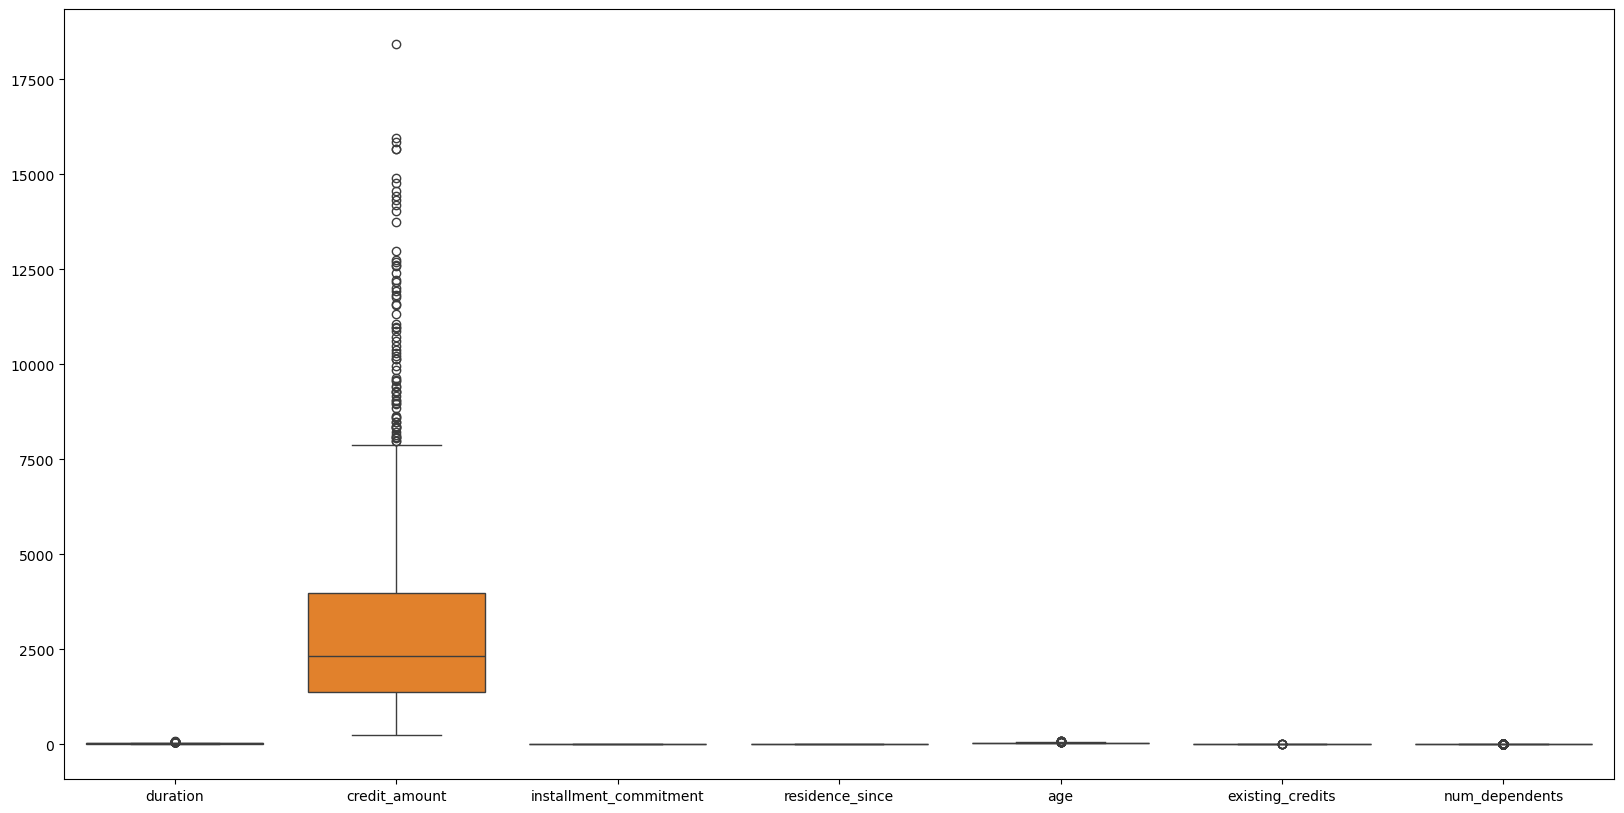

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()

#### Now I am going to start exploring the information and correlations between the variables of the dataset.

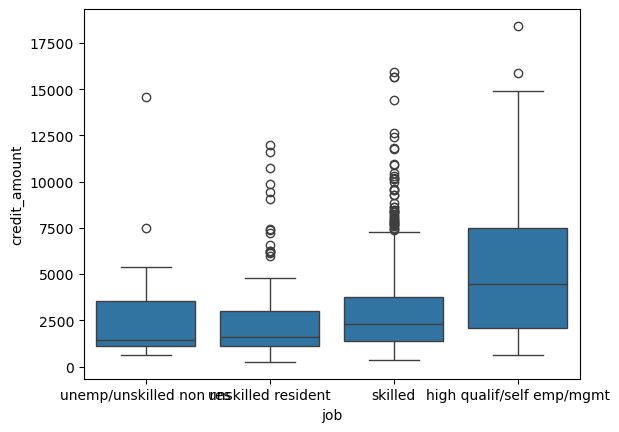

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='job', y='credit_amount', data=df)
plt.show()

### With this chart, we can observe that the more qualified the job is, the higher the credit amount, which may be important for our study

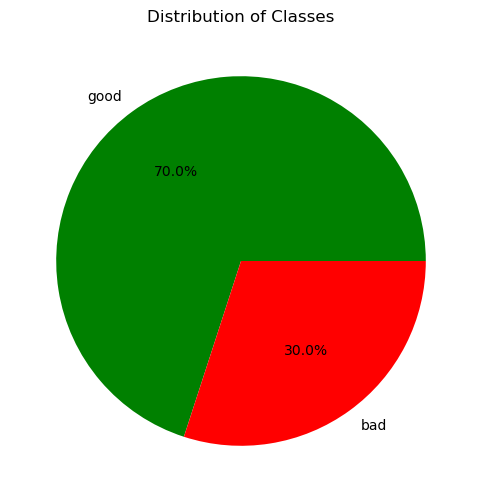

In [18]:
import matplotlib.pyplot as plt
counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribution of Classes')
plt.show()

### As we can see in the examples of the dataset, there are more 'good credit risk' than 'bad credit risk'.
### In the first steps of my work, I will save the dataset in an exported CSV file, as requested in the assignment.

### As a precaution against any potential issues, I decided to create a copy of the original dataset.

In [27]:
caminho_arquivo_csv = "C:\\Users\\nrebe\\Downloads\\ai ideas\\df_tratado.csv"
df.to_csv(caminho_arquivo_csv, index=False)

def carregar_e_preparar_dados(caminho_arquivo_csv):
    df_original = pd.read_csv(caminho_arquivo_csv)
    df = df_original.copy()
    return df



### Define the target of the model to be trained and tested ('class'). Next, I will split the dataset into training and testing sets, allocating 20% of the data for testing and 80% for training.

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop("class", axis=1)
y = df["class"]

## 1.1 - Logistic Regression  

When trying to normalize the data, an error occurred stating that it was not possible to convert categorical data into numbers.  
As we observed when exploring the dataset’s features, most of them are **categorical variables**. For this reason, I used a **pipeline**.  

In this phase, where I will briefly test the performance of the algorithms on my model, I will base the evaluation on three performance elements:  

- **Accuracy**  
- **Confusion Matrix**  
- **F1-score**  


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['category']).columns
numerical_columns = X.select_dtypes(include=['float64', 'uint8']).columns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build preprocessing with ColumnTransformer and Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Build the pipeline with the preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate on training set
train_predictions_lg = pipeline.predict(X_train)
train_accuracy_lg = accuracy_score(y_train, train_predictions_lg)
print(f'Training set accuracy: {train_accuracy_lg}')

# Evaluate on test set
test_predictions_lg = pipeline.predict(X_test)
test_accuracy_lg = accuracy_score(y_test, test_predictions_lg)
print(f'Test set accuracy: {test_accuracy_lg}')

# Confusion matrix
confusion_matrix_lg = confusion_matrix(y_test, test_predictions_lg)
print(f'Confusion matrix on test set:\n {confusion_matrix_lg}')

# F1-score
f1_score_test_lg = f1_score(y_test, test_predictions_lg, average="weighted")
print(f'F1-score on test set: {f1_score_test_lg}')

# Overfitting check
overfitting_lg = test_accuracy_lg / train_accuracy_lg
print(f'Overfitting value: {overfitting_lg}')


Training set accuracy: 0.77375
Test set accuracy: 0.795
Confusion matrix on test set:
 [[ 33  26]
 [ 15 126]]
F1-score on test set: 0.7883107396893242
Overfitting value: 1.0274636510500808


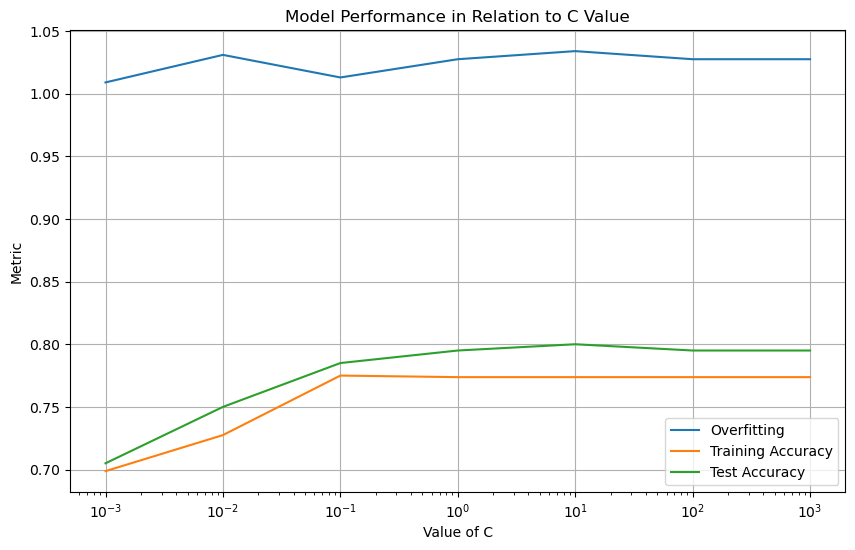

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define a list of C values to test
values_C = np.logspace(-3, 3, 7)

# Lists to store the metrics
overfitting_list = []
train_accuracy_list = []
test_accuracy_list = []

max_iter = 1000

for C in values_C:
    # Build the pipeline with the new C value
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, max_iter=max_iter, random_state=42))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    train_predictions = pipeline.predict(X_train)
    test_predictions = pipeline.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    overfitting = test_accuracy / train_accuracy
    
    # Store metrics
    overfitting_list.append(overfitting)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(values_C, overfitting_list, label='Overfitting')
plt.plot(values_C, train_accuracy_list, label='Training Accuracy')
plt.plot(values_C, test_accuracy_list, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Metric')
plt.title('Model Performance in Relation to C Value')
plt.legend()
plt.grid(True)
plt.show()


### Graph Interpretation

- **Value of C = 10^-3**  
  In this case, both training and test accuracy are relatively low and close to each other.  
  The overfitting value is close to 1.  

- **Value of C = 10^-1**  
  In this case, both training and test accuracy increased.  
  Overfitting is still close to 1 but decreased slightly, indicating that the model is behaving reasonably well.  

- **Value of C = 10^1**  
  In this case, we observe a drop in test accuracy while training accuracy remains almost constant compared to the previous C value.  
  Overfitting decreased.  

- **Value of C = 10^3**  
  In this case, we see a drop in test accuracy, while training accuracy remains almost the same as the previous C value.  
  Overfitting showed a slight but considerable decrease compared to the previous C value.  

---

### Conclusion  
We can identify a pattern in the relationship between **overfitting, training accuracy, and test accuracy**.  
The closer the training and test accuracy values are, the closer the overfitting value is to **1**.  


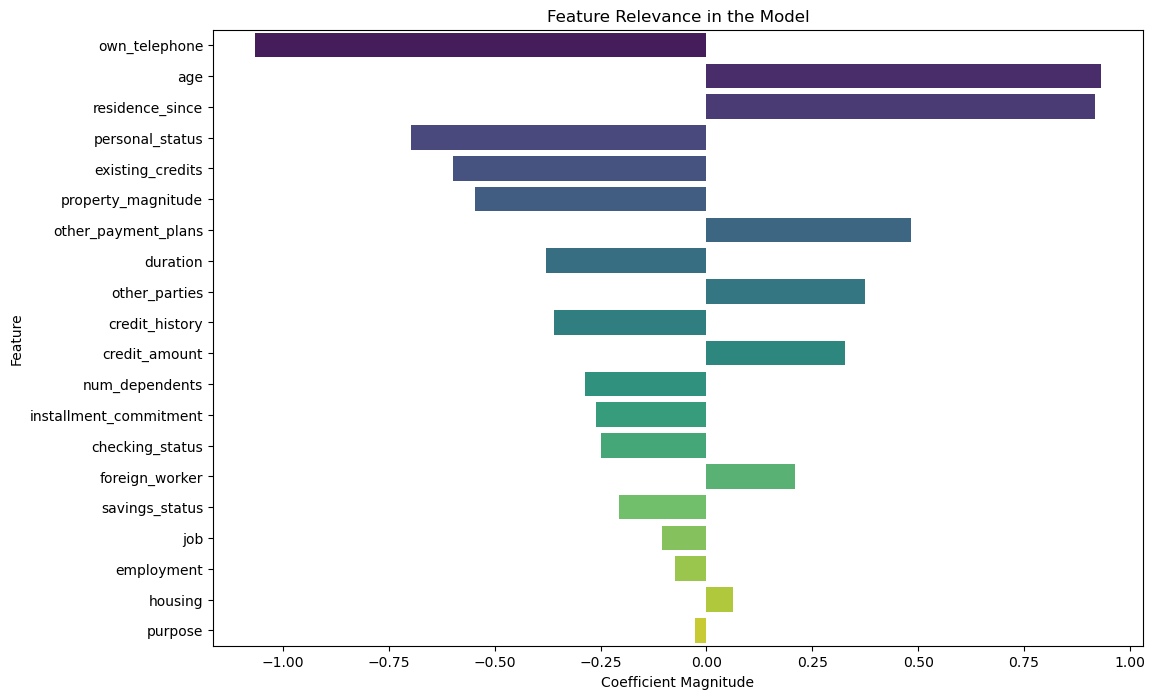

In [31]:
# Show the relevance of the variables in the model to better understand the relationships
coef = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns
min_length = min(len(feature_names), len(coef))
feature_names = feature_names[:min_length]
coef = coef[:min_length]

# Create a DataFrame with features and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Sort by absolute coefficient value (importance)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df,
    palette='viridis',
    hue='Feature',
    legend=False
)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Relevance in the Model')
plt.show()


### As we can observe in the chart, the variables 'purpose', 'employment', 'housing', and 'job' have little importance in the model we are testing. I will remove these four variables and test the model again to see if there is any improvement in the training and testing results.

In [33]:
features_removed_reglog = ["purpose", "employment", "housing", "job"]
X_train_no_features_reglog = X_train.drop(features_removed_reglog, axis=1)
X_test_no_features_reglog = X_test.drop(features_removed_reglog, axis=1)

# Recalculate categorical and numerical columns after removing features
categorical_columns_no_features = X_train_no_features_reglog.select_dtypes(include=['category']).columns
numerical_columns_no_features = X_train_no_features_reglog.select_dtypes(include=['float64', 'uint8']).columns

# Build the preprocessor without the removed features
preprocessor_no_features = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns_no_features),
        ('cat', OneHotEncoder(), categorical_columns_no_features)
    ]
)

# Build the pipeline without the removed features
pipeline_no_features = Pipeline([
    ('preprocessor', preprocessor_no_features),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
pipeline_no_features.fit(X_train_no_features_reglog, y_train)

# Predictions
train_predictions_no_features = pipeline_no_features.predict(X_train_no_features_reglog)
test_predictions_no_features = pipeline_no_features.predict(X_test_no_features_reglog)

# Metrics
train_accuracy_no_features = accuracy_score(y_train, train_predictions_no_features)
test_accuracy_no_features = accuracy_score(y_test, test_predictions_no_features)
confusion_matrix_no_features = confusion_matrix(y_test, test_predictions_no_features)
f1_score_test_no_features = f1_score(y_test, test_predictions_no_features, average="weighted")

# Show the results of the model after removing the least relevant features
print(f"Training accuracy without the features: {train_accuracy_no_features:.2f}")
print(f"Test accuracy without the features: {test_accuracy_no_features:.2f}")
print("Confusion Matrix without the features:\n", confusion_matrix_no_features)
print(f"F1-score on the test set: {f1_score_test_no_features}")


Training accuracy without the features: 0.77
Test accuracy without the features: 0.78
Confusion Matrix without the features:
 [[ 31  28]
 [ 16 125]]
F1-score on the test set: 0.772036965729688


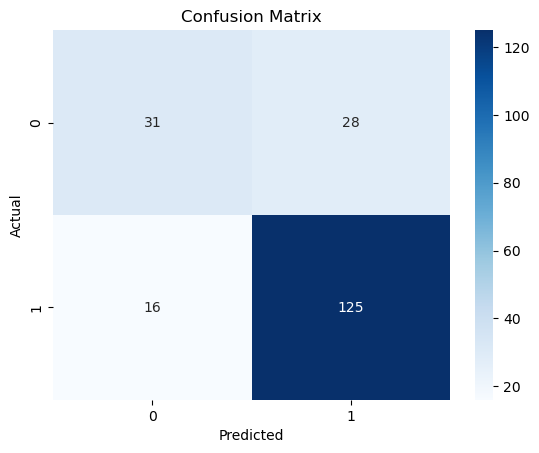

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, test_predictions_no_features)

# Plot heatmap
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [37]:
# Predictions without the least relevant features
train_predictions_no_features = pipeline_no_features.predict(X_train_no_features_reglog)
test_predictions_no_features = pipeline_no_features.predict(X_test_no_features_reglog)

# Metrics
precisao_treino_sem_features = accuracy_score(y_train, train_predictions_no_features)
precisao_teste_sem_features = accuracy_score(y_test, test_predictions_no_features)




In [38]:
print("Results of the model with all features:")
print(f"Training accuracy: {precisao_treino_lg:.2f}")
print(f"Test accuracy: {precisao_teste_lg:.2f}")
print()
print("Results of the model without the least relevant features:")
print(f"Training accuracy without features: {precisao_treino_sem_features:.2f}")
print(f"Test accuracy without features: {precisao_teste_sem_features:.2f}")


Results of the model with all features:
Training accuracy: 0.77
Test accuracy: 0.80

Results of the model without the least relevant features:
Training accuracy without features: 0.77
Test accuracy without features: 0.78


**As we can observe from the results presented above, it is not worth removing the *less relevant features*, since this does not improve the final outcome of our model.**  

I will continue to study the **Logistic Regression** algorithm in greater depth, as it was the algorithm with the **best performance**.


In [39]:
# Tune hyperparameters and search for the best ones
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],  # both support l1/l2
    'classifier__random_state': [10, 15, 20, 30, 35, 40, 45],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

best_params_lg = grid_search.best_params_
best_cv_score_lg = grid_search.best_score_
print("Best hyperparameters found:")
print(best_params_lg)
print(f"Best CV accuracy (mean over folds): {best_cv_score_lg:.4f}")

best_model = grid_search.best_estimator_

# Test-set evaluation
test_predictions_lg_optimized = best_model.predict(X_test)
test_accuracy_lg_optimized = accuracy_score(y_test, test_predictions_lg_optimized)
print("\nOptimized test accuracy:")
print(f"{test_accuracy_lg_optimized:.4f}")

conf_matrix_lg_optimized = confusion_matrix(y_test, test_predictions_lg_optimized)
print("\nOptimized Confusion Matrix:")
print(conf_matrix_lg_optimized)

f1_lg_optimized = f1_score(y_test, test_predictions_lg_optimized, average='weighted')
print(f"\nOptimized F1-score (weighted): {f1_lg_optimized:.4f}")


Best hyperparameters found:
{'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__random_state': 10, 'classifier__solver': 'liblinear'}
Best CV accuracy (mean over folds): 0.7537

Optimized test accuracy:
0.7850

Optimized Confusion Matrix:
[[ 29  30]
 [ 13 128]]

Optimized F1-score (weighted): 0.7730


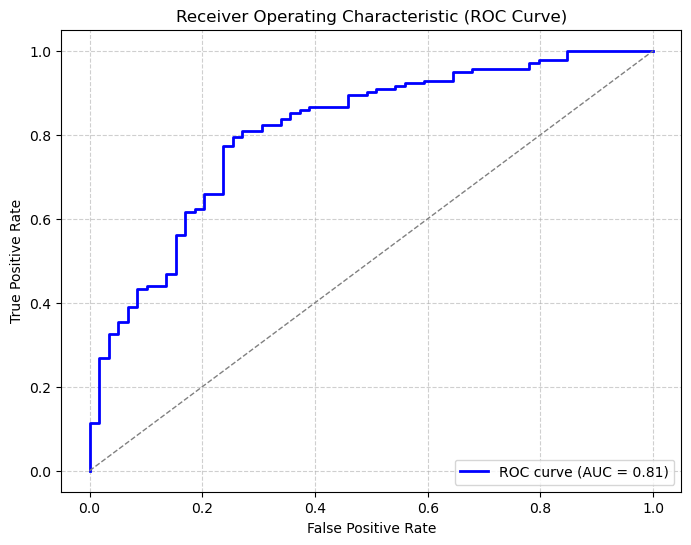

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the labels ('good' = 1, 'bad' = 0)
y_test_encoded = label_encoder.fit_transform(y_test)

# Predicted probabilities from the best model
probs = best_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, probs)

# Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix

# Function to adjust the threshold
def adjust_threshold(model, X_test, y_test_encoded):
    probs = model.predict_proba(X_test)[:, 1]
    
    # Define a list of thresholds to evaluate
    thresholds = [0.2, 0.3, 0.4, 0.5, 0.59, 0.6, 0.7, 0.8, 0.9]
    
    for threshold in thresholds:
        y_pred = (probs >= threshold).astype(int)
        cm = confusion_matrix(y_test_encoded, y_pred)
        fp = cm[0, 1]  # False Positives
        fn = cm[1, 0]  # False Negatives
        print(f"Threshold: {threshold:.2f}, False Positives: {fp}, False Negatives: {fn}")

print("\nThreshold adjustment for the optimized model:")
adjust_threshold(best_model, X_test, y_test_encoded)



Threshold adjustment for the optimized model:
Threshold: 0.20, False Positives: 55, False Negatives: 0
Threshold: 0.30, False Positives: 50, False Negatives: 3
Threshold: 0.40, False Positives: 40, False Negatives: 6
Threshold: 0.50, False Positives: 30, False Negatives: 13
Threshold: 0.59, False Positives: 23, False Negatives: 20
Threshold: 0.60, False Positives: 22, False Negatives: 21
Threshold: 0.70, False Positives: 14, False Negatives: 48
Threshold: 0.80, False Positives: 9, False Negatives: 72
Threshold: 0.90, False Positives: 1, False Negatives: 107


**Why did I want to observe so many thresholds with emphasis on the number of *False Positives* (granting credit to clients who will eventually become bad payers) and *False Negatives* (rejecting credit to clients who would have been good payers)?**  

At this stage, the bank must decide whether it prefers to have the **lowest possible number of False Positives**, the **lowest possible number of False Negatives**, or a **balanced model** between the two.  
This decision will depend on the **level of risk** the bank is willing to take.  

Consequently, my role is to **present the different possibilities** to the bank.  
I will now show the **performance of the model’s evaluation metrics** as a function of the **threshold**, in order to emphasize (or not) specific characteristics.


In [42]:
# Define the desired threshold value
threshold = 0.59

# Classify instances based on the specified threshold
y_pred = (probs >= threshold).astype(int)

# Calculate accuracy and F1-score with the new threshold
accuracy_moderate = accuracy_score(y_test_encoded, y_pred)
f1_moderate = f1_score(y_test_encoded, y_pred, average='weighted')
confusion_matrix_moderate = confusion_matrix(y_test_encoded, y_pred)

# Print the results
print(f"For threshold {threshold}:")
print(f"Accuracy: {accuracy_moderate:.4f}")
print(f"F1-score: {f1_moderate:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix_moderate}")


For threshold 0.59:
Accuracy: 0.7850
F1-score: 0.7833
Confusion Matrix:
[[ 36  23]
 [ 20 121]]


#### This is the model that tries to balance the values of FP and FN.

In [44]:
threshold = 0.2
y_pred = (probs >= threshold).astype(int)

# Calculate metrics
accuracy_less_fn = accuracy_score(y_test_encoded, y_pred)
f1_less_fn = f1_score(y_test_encoded, y_pred, average='weighted')
confusion_matrix_less_fn = confusion_matrix(y_test_encoded, y_pred)

# Print results
print(f"For threshold {threshold}:")
print(f"Accuracy: {accuracy_less_fn:.4f}")
print(f"F1-score: {f1_less_fn:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix_less_fn}")


For threshold 0.2:
Accuracy: 0.7250
F1-score: 0.6274
Confusion Matrix:
[[  4  55]
 [  0 141]]


#### This variant is more aggressive, trying to minimize FN results as much as possible.

In [46]:
threshold = 0.9

# Classify instances based on the specified threshold
y_pred = (probs >= threshold).astype(int)

# Calculate accuracy and F1-score with the new threshold
accuracy_less_fp = accuracy_score(y_test_encoded, y_pred)
f1_less_fp = f1_score(y_test_encoded, y_pred, average='weighted')
confusion_matrix_less_fp = confusion_matrix(y_test_encoded, y_pred)

# Print the results
print(f"For threshold {threshold}:")
print(f"Accuracy: {accuracy_less_fp:.4f}")
print(f"F1-score: {f1_less_fp:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix_less_fp}")


For threshold 0.9:
Accuracy: 0.4600
F1-score: 0.4252
Confusion Matrix:
[[ 58   1]
 [107  34]]


#### Esta variante tambem é mais agressiva tentando diminuir ao maximo os resultados de FP

In [51]:
import pandas as pd

results = pd.DataFrame(
    {
        "Test Accuracy": [
            precisao_teste_lg,
            precisao_teste_sem_features,
            test_accuracy_lg_optimized,
            accuracy_moderate,         # thr = 0.59 (Balanced)
            accuracy_less_fp,          # thr = 0.90 (Less FP)
            accuracy_less_fn,          # thr = 0.20 (Less FN)
        ],
        "F1-score (weighted)": [
            f1_teste_lg,
            f1_teste_sem_features,
            f1_lg_optimized,
            f1_moderate,
            f1_less_fp,
            f1_less_fn,
        ],
        "Confusion Matrix": [
            conf_matrix_lg,
            conf_matrix_sem_features,
            conf_matrix_lg_optimized,
            confusion_matrix_moderate,
            confusion_matrix_less_fp,
            confusion_matrix_less_fn,
        ],
    },
    index=[
        "Normal Model",
        "Model without least relevant features",
        "Optimized Model",
        "Balanced model (thr=0.59)",
        "Model less FP (thr=0.90)",
        "Model less FN (thr=0.20)",
    ],
)

results




,Test Accuracy,F1-score (weighted),Confusion Matrix
Normal Model,0.795,0.791019,"[[35, 24], [17, 124]]"
Model without least relevant features,0.780,0.772037,"[[31, 28], [16, 125]]"
Optimized Model,0.785,0.773018,"[[29, 30], [13, 128]]"
Balanced model (thr=0.59),0.785,0.783327,"[[36, 23], [20, 121]]"
Model less FP (thr=0.90),0.460,0.425154,"[[58, 1], [107, 34]]"
Model less FN (thr=0.20),0.725,0.627401,"[[4, 55], [0, 141]]"


# 1.2-SVM (Support Vector Machine)

In [55]:
def carregar_e_preparar_dados(caminho_arquivo_csv):
   df_original = pd.read_csv(caminho_arquivo_csv)
   df_svm = df_original.copy()
   return df_svm
df_svm = carregar_e_preparar_dados(caminho_arquivo_csv)

In [56]:
df_svm.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [57]:
X = df_svm.drop("class", axis=1)
y = df_svm["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['category']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit
pipeline.fit(X_train, y_train)

# Predictions
train_predictions_svm = pipeline.predict(X_train)
test_predictions_svm = pipeline.predict(X_test)

# Metrics
train_accuracy_svm = accuracy_score(y_train, train_predictions_svm)
test_accuracy_svm  = accuracy_score(y_test, test_predictions_svm)
confusion_matrix_svm = confusion_matrix(y_test, test_predictions_svm)
f1_score_test_svm = f1_score(y_test, test_predictions_svm, average='weighted')

# Output
print(f"Training accuracy: {train_accuracy_svm:.2f}")
print(f"Test accuracy: {test_accuracy_svm:.2f}")
print("Confusion Matrix (test):\n", confusion_matrix_svm)
print(f"F1-score (test): {f1_score_test_svm:.2f}")


Training accuracy: 0.74
Test accuracy: 0.73
Confusion Matrix (test):
 [[  8  51]
 [  2 139]]
F1-score (test): 0.66


**From the results obtained, we observe that _Logistic Regression_ performed better than _SVM_, which provides an indication of the quality of _Logistic Regression_’s performance relative to the model we are testing.**


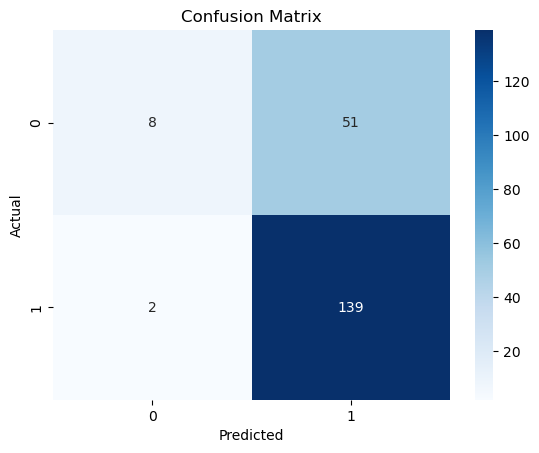

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, test_predictions_svm)  

# Heatmap
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


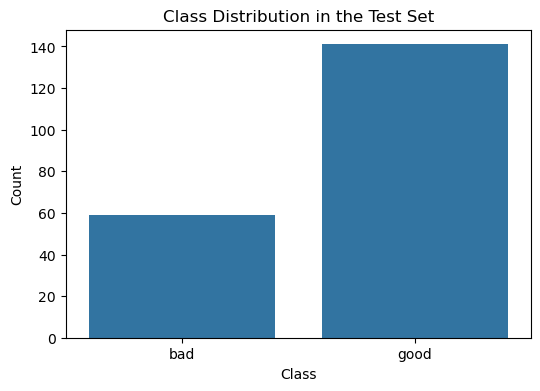

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual target results in the test set
true_results = pd.Series(y_test, name="class")  # Use "class" if that's the correct target name

# Bar chart for the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=true_results)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in the Test Set')
plt.show()


# 1.3 DecisionTreeClassifier

In [61]:
# 1.3 — DecisionTreeClassifier

def load_and_prepare_data(csv_file_path):
    df_original = pd.read_csv(csv_file_path)
    df_dec_tree = df_original.copy()
    return df_dec_tree

df_dec_tree = load_and_prepare_data(caminho_arquivo_csv)
X = df_dec_tree.drop("class", axis=1)
y = df_dec_tree["class"]
X_train, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

categorical_columns = X.select_dtypes(include=['category']).columns
numerical_columns   = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

# dtc means DecisionTreeClassifier
train_predictions_dtc = pipeline.predict(X_train)
train_accuracy_dtc = accuracy_score(y_train, train_predictions_dtc)
print(f'Training set accuracy: {train_accuracy_dtc}')

test_predictions_dtc = pipeline.predict(X_test)
test_accuracy_dtc = accuracy_score(y_test, test_predictions_dtc)
print(f'Test set accuracy: {test_accuracy_dtc}')

confusion_matrix_dtc = confusion_matrix(y_test, test_predictions_dtc)
print(f'Confusion matrix on the test set:\n {confusion_matrix_dtc}')

f1_score_test_dtc = f1_score(y_test, test_predictions_dtc, average="weighted")
print(f'F1-score on the test set: {f1_score_test_dtc}')

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = grid_search.best_estimator_

best_model_predictions = best_model.predict(X_test)
test_accuracy_dtc_optimized = accuracy_score(y_test, best_model_predictions)
print("Test set accuracy with optimized model:", test_accuracy_dtc_optimized)

confusion_matrix_dtc_optimized = confusion_matrix(y_test, best_model_predictions)
print(f'Confusion matrix on the test set:\n {confusion_matrix_dtc_optimized}')

f1_score_test_dtc_optimized = f1_score(y_test, best_model_predictions, average="weighted")
print(f'F1-score on the test set: {f1_score_test_dtc_optimized}')


Training set accuracy: 1.0
Test set accuracy: 0.6
Confusion matrix on the test set:
 [[21 38]
 [42 99]]
F1-score on the test set: 0.6036796792074537
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Test set accuracy with optimized model: 0.71
Confusion matrix on the test set:
 [[ 11  48]
 [ 10 131]]
F1-score on the test set: 0.6583437499999999


**As we can observe, the optimized version of the model performs better across the three evaluation metrics.**

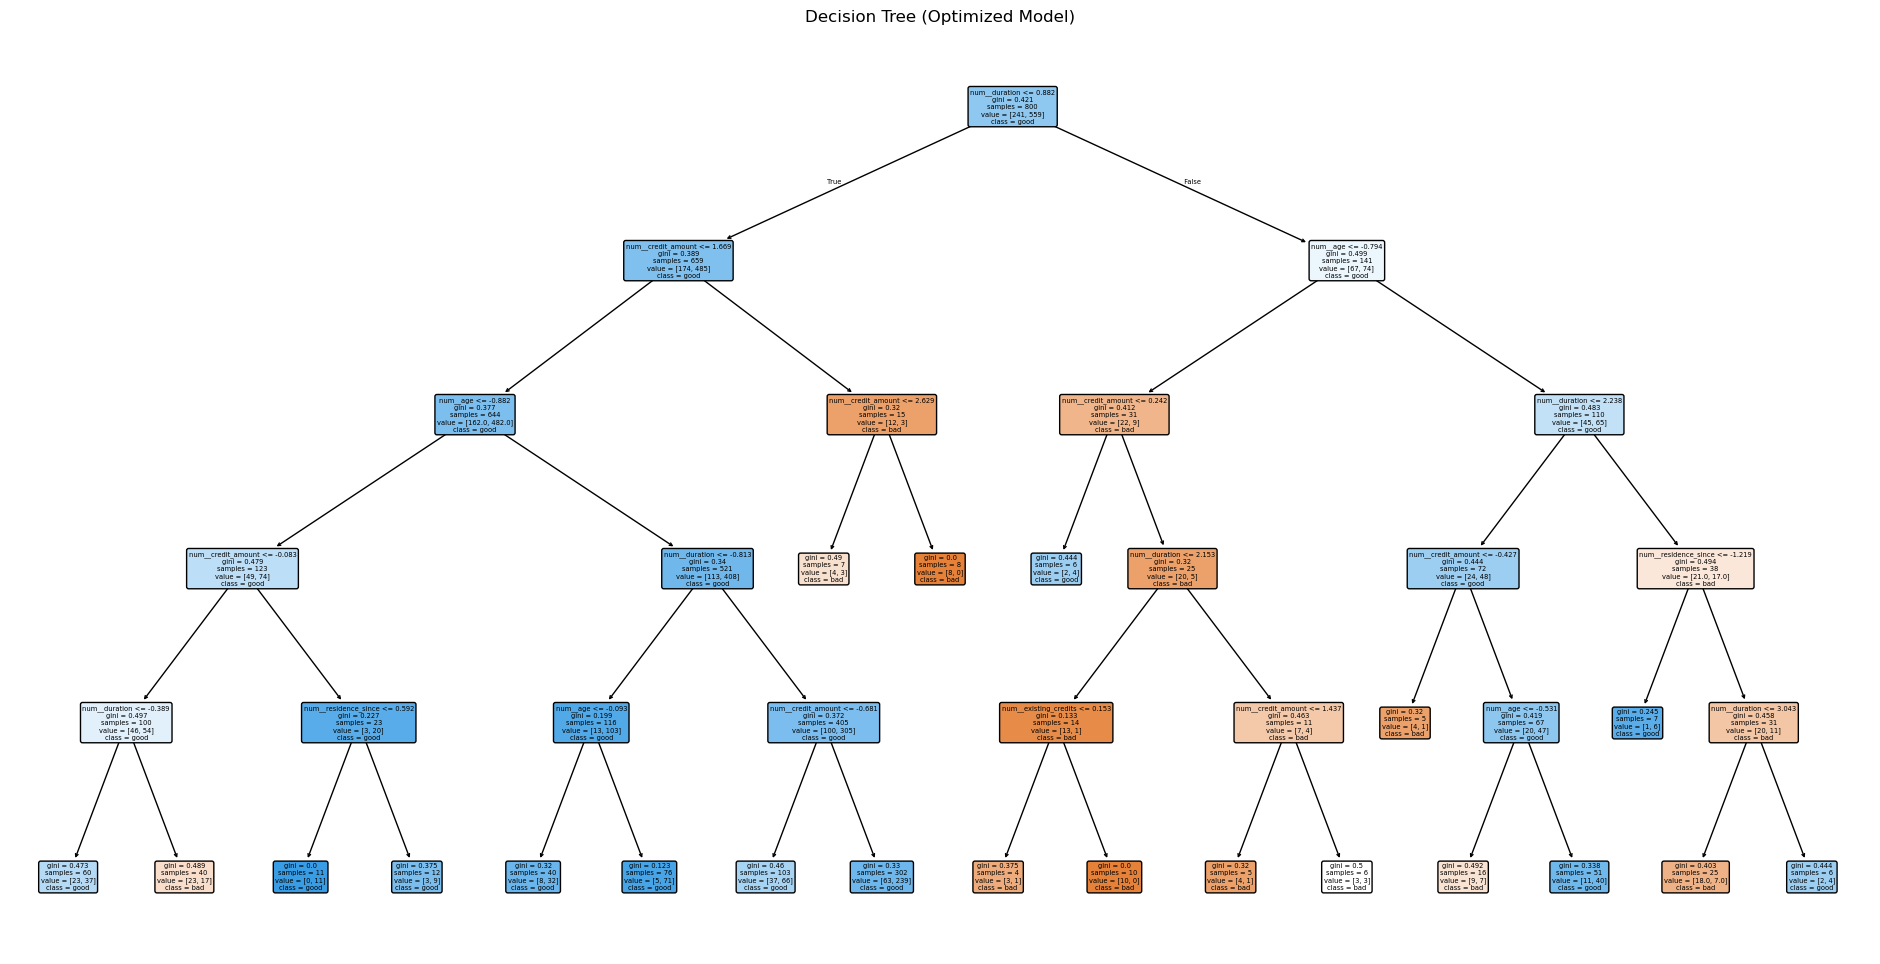

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils.validation import check_is_fitted

# Extract fitted steps
clf = best_model.named_steps['classifier']
preproc = best_model.named_steps.get('preprocessador') or best_model.named_steps.get('preprocessor')

# Ensure the preprocessor is fitted (some pipelines/clones may not carry fitted state as expected)
try:
    check_is_fitted(preproc)
except Exception:
    # Fit using the same training data schema
    preproc.fit(X_train, y_train)

# Get feature names from the fitted ColumnTransformer
try:
    feature_names = preproc.get_feature_names_out()
except Exception:
    # Fallback: try to compose names manually
    num_cols = preproc.transformers_[0][2]
    ohe = preproc.named_transformers_['cat']
    cat_cols = preproc.transformers_[1][2]
    # ensure encoder is fitted
    try:
        check_is_fitted(ohe)
    except Exception:
        ohe.fit(X_train[cat_cols])
    cat_feature_names = ohe.get_feature_names_out(cat_cols)
    feature_names = np.r_[num_cols, cat_feature_names]

# Safety check: lengths must match the number of features seen by the classifier
if len(feature_names) != getattr(clf, "n_features_in_", len(feature_names)):
    feature_names = [f"feature_{i}" for i in range(getattr(clf, "n_features_in_", len(feature_names)))]

# Class names as strings
class_names = [str(c) for c in clf.classes_]

# Plot
plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    max_depth=5  # optional: limit depth for readability
)
plt.title("Decision Tree (Optimized Model)")
plt.show()



# 1.4 Random Forest

In [68]:
def load_and_prepare_data(csv_file_path):
    df_original = pd.read_csv(csv_file_path)
    df_rf = df_original.copy()
    return df_rf

df_rf = load_and_prepare_data(caminho_arquivo_csv)

X = df_rf.drop("class", axis=1)
y = df_rf["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['category']).columns
numerical_columns   = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit
pipeline.fit(X_train, y_train)

# rf means RandomForestClassifier
train_predictions_rf = pipeline.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
print(f'Training set accuracy: {train_accuracy_rf}')

test_predictions_rf = pipeline.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
print(f'Test set accuracy: {test_accuracy_rf}')

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)
print(f'Confusion matrix on the test set:\n {confusion_matrix_rf}')

f1_score_test_rf = f1_score(y_test, test_predictions_rf, average='weighted')
print(f'F1-score on the test set: {f1_score_test_rf}')


Training set accuracy: 1.0
Test set accuracy: 0.705
Confusion matrix on the test set:
 [[ 15  44]
 [ 15 126]]
F1-score on the test set: 0.6706922215397956


In [71]:
# Hyperparameter grid
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__n_estimators': [50, 100, 200],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
print("Best parameters:", best_params_rf)

best_model_rf = grid_search.best_estimator_

best_model_predictions_rf = best_model_rf.predict(X_test)
test_accuracy_rf_optimized = accuracy_score(y_test, best_model_predictions_rf)
print("Test set accuracy with optimized model:", test_accuracy_rf_optimized)

confusion_matrix_rf_optimized = confusion_matrix(y_test, best_model_predictions_rf)
print(f'Confusion matrix on the test set (optimized):\n {confusion_matrix_rf_optimized}')

f1_score_best_model_rf = f1_score(y_test, best_model_predictions_rf, average='weighted')
print(f'F1-score on the test set (optimized): {f1_score_best_model_rf}')

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Test set accuracy with optimized model: 0.73
Confusion matrix on the test set (optimized):
 [[ 13  46]
 [  8 133]]
F1-score on the test set (optimized): 0.6819062500000002


**As we can see, the results of the two versions are very similar.** 

# 1.5 Neural Networks

In [ ]:

def load_and_prepare_data(csv_file_path):
    df_original = pd.read_csv(csv_file_path)
    df_nn = df_original.copy()
    return df_nn

df_nn = load_and_prepare_data(caminho_arquivo_csv)

X = df_nn.drop("class", axis=1)
y = df_nn["class"]
X_train, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['category']).columns
numerical_columns   = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(100, ),
        solver='adam',
        learning_rate_init=0.001,
        alpha=0.0005,
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=15,
        tol=1e-4,
        random_state=42
    ))
])

# Fit
pipeline.fit(X_train, y_train)

# Predictions and metrics (train)
train_predictions_nn = pipeline.predict(X_train)
train_accuracy_nn = accuracy_score(y_train, train_predictions_nn)
print(f'Training set accuracy: {train_accuracy_nn}')

# Predictions and metrics (test)
test_predictions_nn = pipeline.predict(X_test)
test_accuracy_nn = accuracy_score(y_test, test_predictions_nn)
print(f'Test set accuracy: {test_accuracy_nn}')

confusion_matrix_nn = confusion_matrix(y_test, test_predictions_nn)
print("Confusion matrix:", confusion_matrix_nn)

f1_score_test_nn = f1_score(y_test, test_predictions_nn, average='weighted')
print(f'F1-score on the test set: {f1_score_test_nn}')

# Hyperparameter grid
param_grid  = {
    'classifier__hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__early_stopping': [True],
    'classifier__max_iter': [1000],       
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params_nn = grid_search.best_params_

best_model_nn = grid_search.best_estimator_
best_model_predictions_nn = best_model_nn.predict(X_test)
test_accuracy_best_model_nn = accuracy_score(y_test, best_model_predictions_nn)
confusion_matrix_best_model_nn = confusion_matrix(y_test, best_model_predictions_nn)
f1_score_test_best_model_nn = f1_score(y_test, best_model_predictions_nn, average='weighted')

print("Accuracy of the best-parameter model:", test_accuracy_best_model_nn)
print("Confusion matrix of the best-parameter model:", confusion_matrix_best_model_nn)
print("F1-score on the test set:", f1_score_test_best_model_nn)


Training set accuracy: 0.715
Test set accuracy: 0.72
Confusion matrix: [[  5  54]
 [  2 139]]
F1-score on the test set: 0.6314933768825984
Accuracy of the best-parameter model: 0.71
Confusion matrix of the best-parameter model: [[  1  58]
 [  0 141]]
F1-score on the test set: 0.5945686274509804


# Evaluation of the Algorithms

In [77]:
import pandas as pd

results = pd.DataFrame(
    index=["LogisticRegression", "SVM", "DecisionTreeClassifier", "RandomForest", "NeuralNetworks"],
    columns=["Accuracy", "Confusion Matrix", "F1"]
)

test_accuracies = [
    test_accuracy_lg,
    test_accuracy_svm,
    test_accuracy_dtc_optimized,
    test_accuracy_rf,
    test_accuracy_best_model_nn
]

confusion_matrices = [
    confusion_matrix_lg,
    confusion_matrix_svm,
    confusion_matrix_dtc_optimized,
    confusion_matrix_rf,
    confusion_matrix_best_model_nn
]

f1_scores = [
    f1_score_test_lg,
    f1_score_test_svm,
    f1_score_test_dtc_optimized,
    f1_score_test_rf,
    f1_score_test_best_model_nn
]

results["Accuracy"] = test_accuracies
results["Confusion Matrix"] = confusion_matrices
results["F1"] = f1_scores


In [78]:
results

,Accuracy,Confusion Matrix,F1
LogisticRegression,0.795,"[[33, 26], [15, 126]]",0.788311
SVM,0.735,"[[8, 51], [2, 139]]",0.660521
DecisionTreeClassifier,0.710,"[[11, 48], [10, 131]]",0.658344
RandomForest,0.705,"[[15, 44], [15, 126]]",0.670692
NeuralNetworks,0.710,"[[1, 58], [0, 141]]",0.594569


# Conclusion

In my project, **Logistic Regression** achieved the strongest overall performance — **Accuracy ≈ 0.795** and **F1 ≈ 0.788** — and provided the most balanced trade-off between **false positives (FP)** and **false negatives (FN)**. I also tested removing low-importance features, but that **did not improve** the results.

## Model comparison (my takeaways)
- **Logistic Regression:** best overall; balanced FP/FN; solid baseline for deployment.  
- **SVM:** **Accuracy ≈ 0.735**, **F1 ≈ 0.661**; tended to yield more FP, which may be costly depending on risk tolerance.  
- **Decision Tree:** **Accuracy ≈ 0.710**, **F1 ≈ 0.658**; competitive but below Logistic Regression.  
- **Random Forest:** **Accuracy ≈ 0.705**, **F1 ≈ 0.671**; no clear FP/FN advantage over the baseline.  
- **Neural Networks:** **Accuracy ≈ 0.710**, **F1 ≈ 0.595**; lowest F1, likely affected by convergence/training stability.

## Next steps I will take
1. **Threshold tuning** to align with the bank’s risk preference (reduce FP vs. reduce FN).  
2. **Probability calibration** (Platt or isotonic) and **repeated cross-validation** for more reliable probabilities and stability.  
3. **Cost-sensitive evaluation** to reflect the different business costs of FP and FN in credit decisions.


In [1]:
# mostra a pasta atual do notebook
%pwd


'C:\\Users\\nrebe'